In [39]:
import matplotlib.pyplot as plt
import numpy as np # useful for calculations
import h5py #required to read hdf5 files
import matplotlib as mpl
from tqdm import tqdm

import pdb
FloatType = np.float64  # double precision: np.float64, for single use np.float32

def read_gadget_snapshot(file_name):
	data = h5py.File(file_name, 'r')  # load full hdf5 file

	time = FloatType(data['Header'].attrs['Time']) # the scale factor at which snapshot was written
	BoxSize = FloatType(data['Header'].attrs['BoxSize']) # box size in code units (Mpc)

	Pos = np.array(data['PartType1']['Coordinates'], dtype=FloatType) #3d Positions of all particles, e.g. x coord: Pos[:,0]

	mass = FloatType(data['Header'].attrs['MassTable'][1]) # mass of one DM particle

	n_particles = Pos.size // 3

	return time, Pos, mass, n_particles, BoxSize


file_name = "snapshot_002.hdf5"

time, Pos, mass, n_particles, BoxSize = read_gadget_snapshot(file_name)

print("Scale factor: %g  (should be 1)" %(time))

box_vol = BoxSize
mean_dist = (box_vol/n_particles)**(1/3)
print('mean distance between particles = {}'.format(mean_dist))


Scale factor: 1  (should be 1)
mean distance between particles = 0.026718374166823395


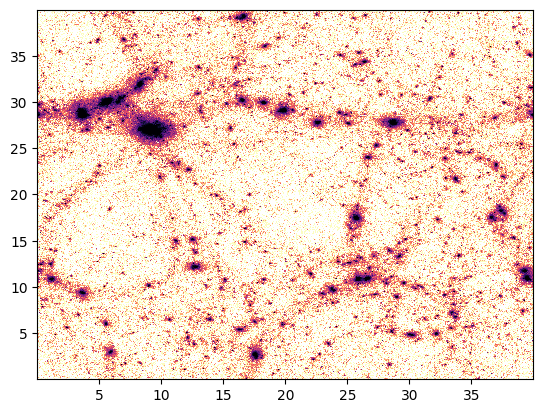

In [40]:
x=Pos[:, 0]
y=Pos[:, 1]
z=Pos[:, 2]

plt.hist2d(x, y, bins = 1000,  norm=mpl.colors.LogNorm(vmin=1, vmax=50), cmap = 'magma_r')
plt.show()

In [41]:
def particle_distance(i, j, positions):
    x_i, y_i, z_i = positions[i, 0], positions[i, 1], positions[i, 2]
    x_j, y_j, z_j = positions[j, 0], positions[j, 1], positions[j, 2]
    return np.sqrt((x_i - x_j)**2 + (y_i - y_j)**2 + (z_i - z_j)**2)

In [45]:
# friends of friends algorithm

# linking length:
linking_length = mean_dist*0.2
print('linking_length = ', linking_length)

# find friends:
all_particles = np.linspace(0, n_particles - 1, n_particles)
# all_particles = np.linspace(0, 9, 10)
lonely = all_particles
num_groups = 0
friend_dict = {}

for i in range(len(all_particles)):  # Generates numbers from 0 to 10
    friend_dict[i] = []

for i in tqdm(range(len(all_particles))):
    print('on particle {}'.format(i))
    for j in tqdm(range(len(lonely))):
        # skip particle distance with itself
        if j == i:
            continue
        else:
            dist = particle_distance(i, j, Pos)
            # print('potential neighbors {}'.format(j))
            # print(dist)
            # check if the particles are friends
            if dist < linking_length:
                friend_dict[i].append(j)
                # print('particle {} and {} are friends'.format(i, j))
            else:
                # particles are not friends
                continue

linking_length =  0.005343674833364679


  0%|          | 0/2097152 [00:00<?, ?it/s]

on particle 0


  0%|          | 1/2097152 [00:06<3522:24:24,  6.05s/it]

on particle 1


  0%|          | 2/2097152 [00:11<3392:00:02,  5.82s/it]

on particle 2


  0%|          | 3/2097152 [00:17<3386:36:13,  5.81s/it]

on particle 3


  0%|          | 4/2097152 [00:23<3440:09:08,  5.91s/it]

on particle 4


  0%|          | 5/2097152 [00:29<3403:28:43,  5.84s/it]

on particle 5


  0%|          | 6/2097152 [00:35<3390:32:47,  5.82s/it]

on particle 6


  0%|          | 6/2097152 [00:39<3877:55:41,  6.66s/it]


KeyboardInterrupt: 